In [2]:
plt.style.use("ggplot")


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv("titanic.csv")
print("Dataset Shape:", df.shape)
df.head()


Dataset Shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
print(f"This dataset has {df.shape[0]} passengers and {df.shape[1]} features.")


This dataset has 891 passengers and 12 features.


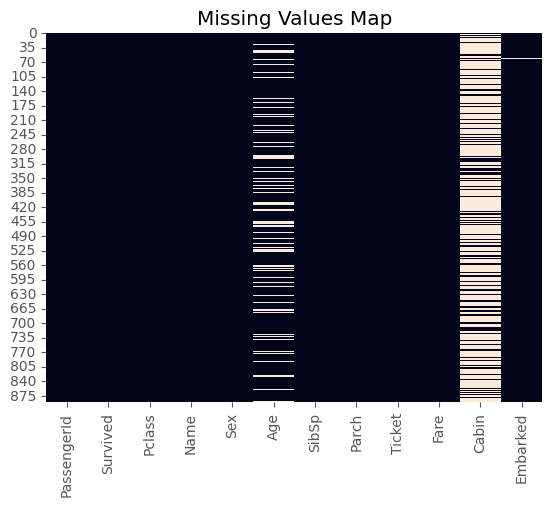

In [ ]:
### Missing values
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Map")
plt.show()

In [7]:
df = pd.read_csv("titanic.csv")
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.mean(numeric_only=True)


PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

In [9]:
df.median(numeric_only=True)


PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
dtype: float64

In [10]:
df.mean(numeric_only=True)


PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

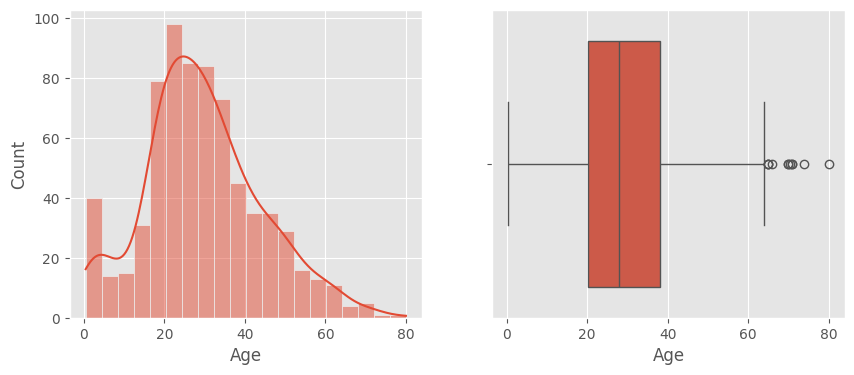

In [19]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.histplot(df['Age'], kde=True)

plt.subplot(1,2,2)
sns.boxplot(x=df['Age'])

plt.show()


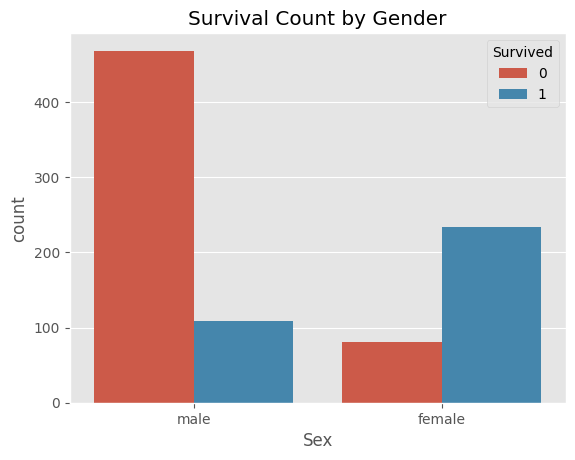

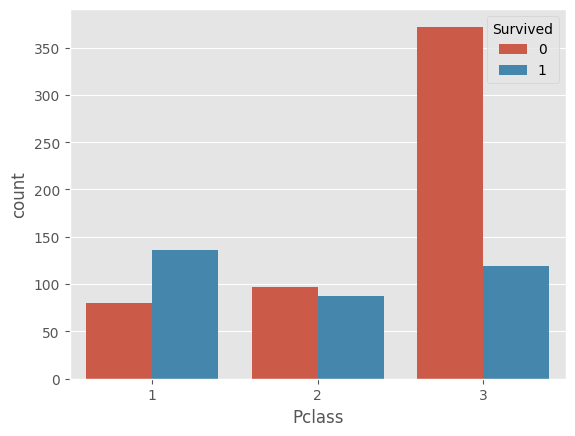

In [23]:
df['AgeGroup'] = pd.cut(df['Age'],
                        bins=[0,12,19,35,60,100],
                        labels=['Child','Teen','Young Adult','Adult','Senior'])
df['FamilySize'] = df['SibSp'] + df['Parch']
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival Count by Gender")
plt.show()
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.show()



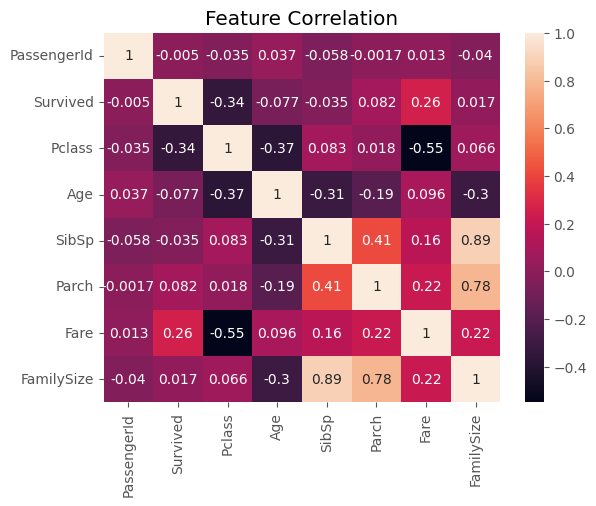

Survived       1.000000
Fare           0.257307
Parch          0.081629
FamilySize     0.016639
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64


In [25]:
corr = df.corr(numeric_only=True)

sns.heatmap(corr, annot=True)
plt.title("Feature Correlation")
plt.show()
print(corr['Survived'].sort_values(ascending=False))



### IDENTIFYING PATTERNS AND TRENDS

From the above graphs and correlation matrix, we observe:
- Female passengers survived more than male passengers.  
- Passenger class strongly affected survival — 1st class had higher survival rates.  
- Fare has a positive relationship with survival.  
- Age shows weak correlation with survival.  
### Age Distribution
- Most passengers are between 20–40 years old.  
- The distribution is slightly right-skewed.  
- A few elderly passengers appear as outliers.  
### Gender Impact
- Female passengers had a much higher survival rate.  
- Majority of male passengers did not survive.  
### Passenger Class Impact
- 1st class passengers had higher survival rates.  
- 3rd class passengers had the highest number of deaths.  
### Fare Analysis
- Fare distribution is highly right-skewed.  
- There are several high-value outliers.  
- Higher fare increases survival chances.  
### Correlation Insights
- Survival is positively correlated with Fare.  
- Survival is negatively correlated with Pclass.  
- FamilySize is highly correlated with SibSp and Parch.  
### Final Conclusion
-Gender and passenger class were the strongest survival factors.  
-Higher-class and female passengers had better survival chances.  
-Age had weaker impact compared to other features.


From the exploratory data analysis of the Titanic dataset, we observed that:
- Gender and passenger class were the strongest factors affecting survival.
- Female passengers had significantly higher survival rates.
- 1st class passengers had better survival chances compared to 3rd class.
- Fare shows a positive relationship with survival.
- Age had a weaker impact on survival.
- Fare distribution contains some extreme outliers.
Overall, socio-economic status and gender played a major role in survival outcomes.
